This is a software that is used to classify breast cancer tumour type. It can determine if the H&E staining picture you input is benign or malignant. We have trained the model with CNN. We provide several models for your choose. Only needs you to download to the model, then input the model path and your picture path in the software, you can get a predicted result. 

Come and give it a try!

In [1]:
# First you need to download the packages needed for this software then import them to the environment
import torch
from torchvision import transforms
import torch.nn as nn
from torchvision.models import resnet50
from PIL import Image
import cv2
import matplotlib.pyplot as plt

ResNet50 is a perfect model that fits our data. It has about 95% validation acuracy! Here, we use it as an example for you to use. In the following command, you load the ResNet50 to prepare the condition for the trained model to run.

In [2]:
# NETS: resnet50
class ResNet50(nn.Module):

    def __init__(self):
        super(ResNet50, self).__init__()
        self.resnet = resnet50()
        self.resnet.fc = nn.Linear(2048, 2) #adjust the output of the last fully connected layer to 2 dimensions

    def forward(self,x):
        return self.resnet(x)

model = ResNet50()

The following function is a function to let you input the model path and your image path. It will first read the image and do some pre-processing work. Then used the trained model to do the prediction.

In [3]:
# The prediction function (for general users)
def TUMOR_TYPE_PREDICTOR(model_path, img_path):

    img = cv2.imread(img_path)
    plt.imshow(img) #print the input image

    transform = transforms.Compose([
        transforms.Resize([224,224]), #resize the image to the specified size
        transforms.ToTensor(), #convert the image to tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) #normalize the images 
    ])

    model = torch.load(model_path, map_location='cpu') #load the trained model and save to cpu for general users no matter Mac or other devices
    model.eval()
    tumor_type = ["benign", "malignant"]
    image = torch.unsqueeze(transform(Image.open(img_path).convert("RGB")), dim=0)
    with torch.no_grad():
        pred = torch.argmax(model(image),dim=-1).cpu().numpy()[0]

    print(f"This breast cancer histopathology slide is predicted to be: {tumor_type[pred]}")

    return

Now, you can input the model path and your image path and give it a try!

This breast cancer histopathology slide is predicted to be: malignant


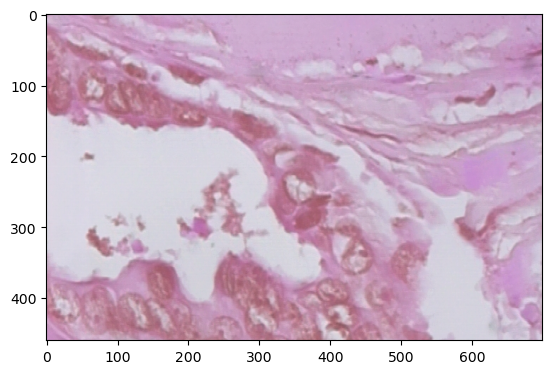

In [4]:
# Try the function!
TUMOR_TYPE_PREDICTOR(model_path='models/resnet50_epoch30_94.23.pth', #please input the model path here
                     img_path='BreaKHis 400X/test/malignant/SOB_M_PC-14-19440-400-001.png') #please input the image path here

Ok, now let's try a benign slide.

This breast cancer histopathology slide is predicted to be: benign


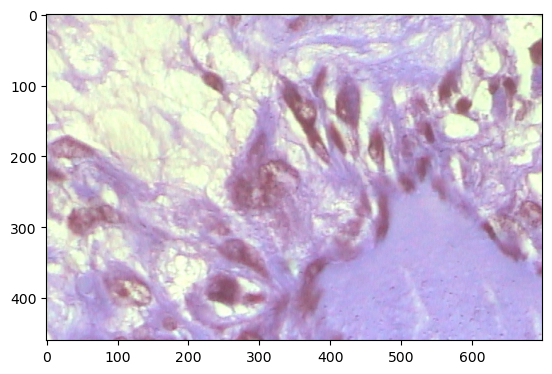

In [5]:
TUMOR_TYPE_PREDICTOR(model_path='models/resnet50_epoch30_94.23.pth', #please input the model path here
                     img_path='BreaKHis 400X/test/benign/SOB_B_PT-14-29315EF-400-013.png') #please input the image path here